In [ ]:
import pandas as pd

In [ ]:


df_header = pd.read_csv("/content/drive/MyDrive/STONYBRK_20240531_HEADER.csv")

## print the first row of the dataframe with each column on a new line
print(df_header.iloc[0])

## print each column name
print(df_header.columns)



ClientId                                                 49
ProspectiveClaimId                                 35216986
ClaimType                                                 P
BillingProviderNPI                               1154376309
BillingProvFirstName       NEW YORK SPINE AND BRAIN SURGERY
BillingProvLastName                                     NaN
AttendingProviderNPI                                    NaN
AttendingProvFirstName                                  NaN
AttendingProvLastName                                   NaN
RenderingProviderNPI                             1902082209
RenderingProvFirstName                             YUEHJIEN
RenderingProvLastName                                   GU 
ReferringProviderNPI                           1467416271.0
ReferringProvFirstName                                DAVID
ReferringProvLastName                         FIORELLA -PHD
OperatingProviderNPI                                    NaN
OperatingProvFirstName                  

In [ ]:
df_code = pd.read_csv("/content/drive/MyDrive/STONYBRK_20240531_CODE.csv")

## print the first row of the dataframe with each column on a new line
print(df_code.iloc[0])

## print each column name
print(df_code.columns)

ClientId                    49
ProspectiveClaimId    36752505
CodeQualifier              ABF
CodePos                      3
CodeValue                G93.6
CodeFromDate               NaN
CodeToDate                 NaN
CodeAmnt                   NaN
POAInd                     NaN
Name: 0, dtype: object
Index(['ClientId', 'ProspectiveClaimId', 'CodeQualifier', 'CodePos',
       'CodeValue', 'CodeFromDate', 'CodeToDate', 'CodeAmnt', 'POAInd'],
      dtype='object')


In [ ]:
### proecdures: data/examples/STONYBRK_20240531_LINE.csv
df_line = pd.read_csv("/content/drive/MyDrive/STONYBRK_20240531_LINE.csv")

## print the first row of the dataframe with each column on a new line
print(df_line.iloc[0])

## print each column name
print(df_line.columns)

ClientId                                              49
ProspectiveClaimId                              35216986
LinePos                                                1
RevCode                                              NaN
HCPCS                                              99291
Modifier1                                             GC
Modifier2                                             25
Modifier3                                            NaN
Modifier4                                            NaN
DxMapDelim                          1,2,3,4,5,6,7,8,9,10
DxMap1                                                 1
DxMap2                                               2.0
DxMap3                                               3.0
DxMap4                                               4.0
ServiceDate                                   09/25/2023
ServiceThruDate                               09/25/2023
Units                                                  1
Charges                        

This step removes unnecessary leading and trailing spaces from column names to prevent errors during merging and grouping.

In [ ]:
df_header.columns = df_header.columns.str.strip()
df_line.columns = df_line.columns.str.strip()
df_code.columns = df_code.columns.str.strip()

In [ ]:
type (df_header)

pandas.core.frame.DataFrame

In [ ]:
# What is the shape of each file
def explore(df, name):
    print(f"--- {name} ---")
    print("Shape:", df.shape)
    print("First 5 rows:\n", df.head())
    print("Columns and types:\n", df.dtypes)
    print("Missing values:\n", df.isna().sum())
    print("Numeric stats:\n", df.describe())
    print("\n")


In [ ]:
# Explore the header file
explore(df_header, "Header file")


--- Header file ---
Shape: (388, 43)
First 5 rows:
    ClientId  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0        49            35216986         P          1154376309   
1        49            35235657         P          1154376309   
2        49            35249003         P          1154376309   
3        49            35249014         P          1154376309   
4        49            35249016         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN      

In [ ]:
# Explore the code file
explore(df_code, "Code file")

--- Code file ---
Shape: (1536, 9)
First 5 rows:
    ClientId  ProspectiveClaimId CodeQualifier  CodePos CodeValue  \
0        49            36752505           ABF        3     G93.6   
1        49            36819490           ABF        4     N17.9   
2        49            35352862           ABF        2     G06.1   
3        49            35244774           ABF       10     G90.8   
4        49            36745815           ABK        1   I77.819   

   CodeFromDate  CodeToDate  CodeAmnt  POAInd  
0           NaN         NaN       NaN     NaN  
1           NaN         NaN       NaN     NaN  
2           NaN         NaN       NaN     NaN  
3           NaN         NaN       NaN     NaN  
4           NaN         NaN       NaN     NaN  
Columns and types:
 ClientId                int64
ProspectiveClaimId      int64
CodeQualifier          object
CodePos                 int64
CodeValue              object
CodeFromDate          float64
CodeToDate            float64
CodeAmnt              f

In [ ]:
# Explore the line file
explore(df_line, "Line file")

--- Line file ---
Shape: (520, 28)
First 5 rows:
    ClientId  ProspectiveClaimId  LinePos  RevCode  HCPCS Modifier1 Modifier2  \
0        49            35216986        1      NaN  99291        GC        25   
1        49            35235657        1      NaN  99291        GC        25   
2        49            35244774        1      NaN  99291        GC        25   
3        49            35249003        1      NaN  99291        GC       NaN   
4        49            35249014        1      NaN  99291        GC       NaN   

   Modifier3  Modifier4            DxMapDelim  ...  PlaceOfService  NDC  \
0        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
1        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
2        NaN        NaN  1,2,3,4,5,6,7,8,9,10  ...              21  NaN   
3        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   
4        NaN        NaN           1,2,3,4,5,6  ...              21  NaN   

   NDCUnits  NDCRx

In [ ]:
# How many unique claims are in the dataset?
unique_claims = df_header["ProspectiveClaimId"].nunique()
print(f"Number of unique claims: {unique_claims}")


Number of unique claims: 388


In [ ]:
# What is the date range of the claims?
df_header["ServiceFromDate"] = pd.to_datetime(df_header["ServiceFromDate"], format="mixed")
df_header["ServiceToDate"] = pd.to_datetime(df_header["ServiceToDate"], format="mixed")

date_range = (
    df_header["ServiceFromDate"].min(),
    df_header["ServiceToDate"].max()
)
date_range


(Timestamp('2023-09-25 00:00:00'), Timestamp('2024-05-29 00:00:00'))

In [ ]:
# How many service lines are there on average per claim?
avg_service_lines = df_line.groupby("ProspectiveClaimId").size().mean()
print("Average number of service lines per claim:", avg_service_lines)

Average number of service lines per claim: 1.3402061855670102


In [ ]:
# How many diagnosis codes are there on average per claim?
average_diagnosis_codes_per_claim = df_header.groupby("ProspectiveClaimId").size().mean()
print("Average number of diagnosis codes per claim:", average_diagnosis_codes_per_claim)


Average number of diagnosis codes per claim: 1.0


In [ ]:
print(df_header.columns)

Index(['ClientId', 'ProspectiveClaimId', 'ClaimType', 'BillingProviderNPI',
       'BillingProvFirstName', 'BillingProvLastName', 'AttendingProviderNPI',
       'AttendingProvFirstName', 'AttendingProvLastName',
       'RenderingProviderNPI', 'RenderingProvFirstName',
       'RenderingProvLastName', 'ReferringProviderNPI',
       'ReferringProvFirstName', 'ReferringProvLastName',
       'OperatingProviderNPI', 'OperatingProvFirstName',
       'OperatingProvLastName', 'ServiceFromDate', 'ServiceToDate',
       'PrimaryPayerName', 'PrimaryPayerCode', 'PrimaryPayerCFI',
       'SecondaryPayer', 'SecondaryPayerCode', 'SecondaryPayerCFI',
       'TertianaryPayer', 'TertianaryPayerCode', 'TertianaryPayerCFI', 'DRG',
       'AdmitType', 'DischargeStatus', 'AdmitDx', 'Facility_Location',
       'CoderId', 'CoderName', 'PlaceOfService', 'WorkQueName', 'WorkQueId',
       'ClinicalTrialIdentifier', 'PriorAuthorizationNo',
       'InvestDeviceExmptNo', 'ReferralNo'],
      dtype='object')


In [ ]:
# Who are the top 5 billing providers by number of claims?
billing_providers = df_header["BillingProvFirstName"].value_counts().head(5)
print("Top 5 billing providers by number of claims:", billing_providers)

Top 5 billing providers by number of claims: BillingProvFirstName
SB INTERNISTS                          152
SB SURGICAL ASSOCIATES                  81
NEW YORK SPINE AND BRAIN SURGERY        69
UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY     40
SB PSYCHIATRIC ASSOCIATES               36
Name: count, dtype: int64


In [ ]:
# Display: Provider name, NPI, and claim count
provider_counts = df_header.groupby(
    ["BillingProvFirstName", "BillingProvLastName", "BillingProviderNPI"]
)["ProspectiveClaimId"].count().reset_index()
provider_counts.columns = ["ProviderFirstName", "ProviderLastName", "NPI", "ClaimCount"]
print(provider_counts)



Empty DataFrame
Columns: [ProviderFirstName, ProviderLastName, NPI, ClaimCount]
Index: []


In [ ]:
# Create a simple bar chart showing the top 5 providers
provider_counts = (
    df_header
        .groupby(["BillingProvFirstName", "BillingProvLastName"], dropna=False)
        .agg(claim_count=("ProspectiveClaimId", "nunique"))
        .reset_index()
        .sort_values("claim_count", ascending=False)
)

top5 = provider_counts.head(5)

print(top5)


                  BillingProvFirstName  BillingProvLastName  claim_count
3                        SB INTERNISTS                  NaN          152
5               SB SURGICAL ASSOCIATES                  NaN           81
0     NEW YORK SPINE AND BRAIN SURGERY                  NaN           69
6  UNIV.ASSOC.IN OBSTETRICS&GYNECOLOGY                  NaN           40
4            SB PSYCHIATRIC ASSOCIATES                  NaN           36


In [ ]:
# What are the top 5 primary payers by claim volume?
primary_payer_counts = df_header["PrimaryPayerName"].value_counts().head(5)

print("Top 5 primary payers by claim volume:")
print(primary_payer_counts)



Top 5 primary payers by claim volume:
PrimaryPayerName
MEDICARE                      242
HEALTHFIRST FFS                46
FIDELIS/BETTER HEALTH PLAN     26
HIP MEDICAID                   17
HEALTHFIRST CAPITATED          10
Name: count, dtype: int64


In [ ]:
# Calculate the percentage of total claims for each payer
total_claims = len(df_header)

payer_claim_counts = df_header["PrimaryPayerName"].value_counts()

payer_percentages = (payer_claim_counts / total_claims) * 100

print(payer_percentages)


PrimaryPayerName
MEDICARE                                  62.371134
HEALTHFIRST FFS                           11.855670
FIDELIS/BETTER HEALTH PLAN                 6.701031
HIP MEDICAID                               4.381443
HEALTHFIRST CAPITATED                      2.577320
AETNA                                      1.546392
DIRECT SELF PAY                            1.546392
UNITED COMMUNITY PLAN GOVT PROGRAM         1.288660
FIDELIS CAPITATED                          1.288660
EMPIRE BLUE SR                             1.030928
MAGNACARE                                  0.773196
MMIS                                       0.515464
EMPIRE BLUE PPO                            0.515464
AETNA MEDICARE                             0.515464
CIGNA HMO                                  0.515464
MEDICAID EMERGENT SERVICES                 0.515464
TRICARE HUMANA                             0.257732
EMPIRE BLUE HMO                            0.257732
BLUES EXCHANGE                             0.25

In [ ]:
import matplotlib.pyplot as plt

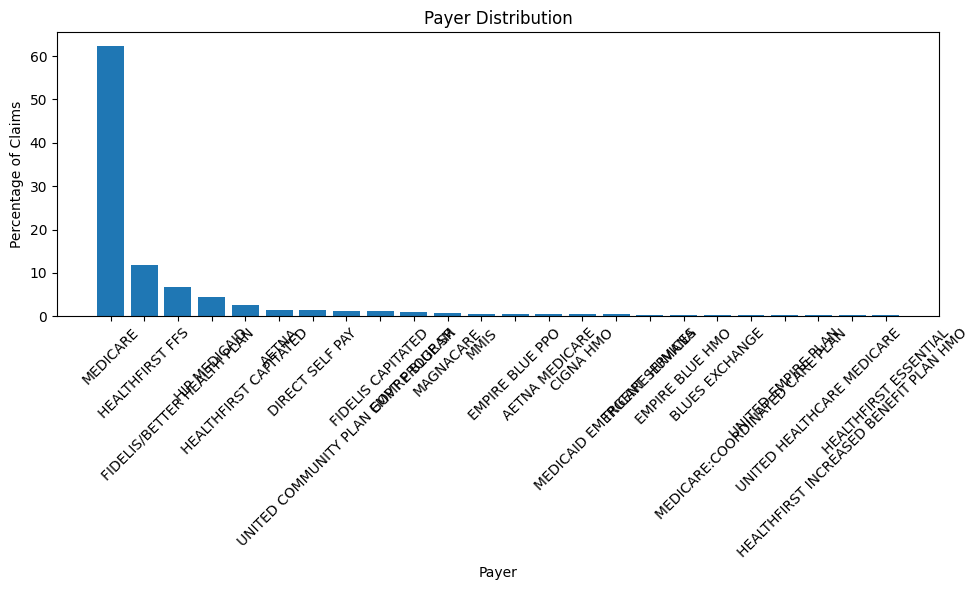

In [ ]:
# Create a bar chart or pie chart showing payer distribution
plt.figure(figsize=(10, 6))
plt.bar(payer_percentages.index, payer_percentages.values)
plt.xlabel("Payer")
plt.ylabel("Percentage of Claims")
plt.title("Payer Distribution")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()





In [ ]:
# What are the 10 most frequently appearing diagnosis codes (CodeValue)?
diagnosis_code_counts = df_code["CodeValue"].value_counts().head(10)
print("10 most frequently appearing diagnosis codes:")
print(diagnosis_code_counts)


10 most frequently appearing diagnosis codes:
CodeValue
J96.01    62
I10       49
E78.5     49
G93.5     34
D64.9     29
I25.10    27
I61.9     26
I48.91    24
I60.8     24
I50.9     22
Name: count, dtype: int64


In [ ]:
# Display: ICD-10 code and frequency count
diagnosis_code_counts = df_code["CodeValue"].value_counts().reset_index()
diagnosis_code_counts.columns = ["ICD-10 Code", "Frequency"]
print(diagnosis_code_counts)


    ICD-10 Code  Frequency
0        J96.01         62
1           I10         49
2         E78.5         49
3         G93.5         34
4         D64.9         29
..          ...        ...
484       Z13.0          1
485       K83.1          1
486      E11.51          1
487       A15.9          1
488     I77.819          1

[489 rows x 2 columns]


In [ ]:
# Show top 10 codes
top10_codes = (
    df_code.groupby(["CodePos", "CodeValue"])
           .size()
           .reset_index(name="Frequency")
           .sort_values("Frequency", ascending=False)
           .head(10)
)

print(top10_codes)

     CodePos CodeValue  Frequency
754        7    J96.01         15
437        3       I10         15
79         1     I60.8         15
561        4       I10         14
68         1    I25.10         13
434        3     G93.6         13
635        5     E78.5         12
837       12     G93.5         11
537        4     D64.9         11
81         1     I61.9         11


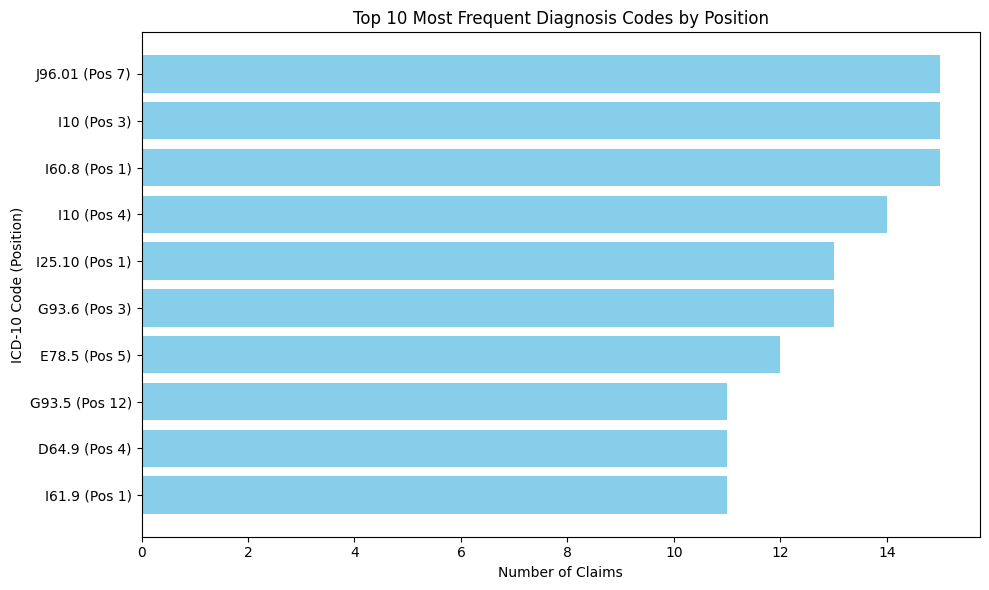

In [ ]:
import matplotlib.pyplot as plt
# Create a table with top 10 most frequent Diagnosis codes
plt.figure(figsize=(10,6))
plt.barh(top10_codes["CodeValue"] + " (Pos " + top10_codes["CodePos"].astype(str) + ")",
         top10_codes["Frequency"], color='skyblue')
plt.xlabel("Number of Claims")
plt.ylabel("ICD-10 Code (Position)")
plt.title("Top 10 Most Frequent Diagnosis Codes by Position")
plt.gca().invert_yaxis()
plt.tight_layout()
plt.show()

In [ ]:
# What are the 10 most frequently billed procedure codes (HCPCS)? Display: HCPCS code, description (if available in data), and frequency Create a bar chart showing the top 10 procedures
# Count frequency of each HCPCS code
hcpcs_counts = df_line["HCPCS"].value_counts().reset_index()
hcpcs_counts.columns = ["HCPCS", "Frequency"]

# Optional: add description if available
# Assuming df_line has a column 'ProcedureDesc'
if "ProcedureDesc" in df_line.columns:
    desc = df_line[["HCPCS", "ProcedureDesc"]].drop_duplicates()
    hcpcs_counts = hcpcs_counts.merge(desc, on="HCPCS", how="left")

# Get top 10 most frequent
top10_hcpcs = hcpcs_counts.head(10)
print(top10_hcpcs)

   HCPCS  Frequency
0  99291         68
1  99233         48
2  99213         39
3  99223         33
4  99222         32
5  99232         21
6  90833         16
7  99204         14
8  99214         14
9  92557         14


/tmp/ipython-input-2441600419.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(


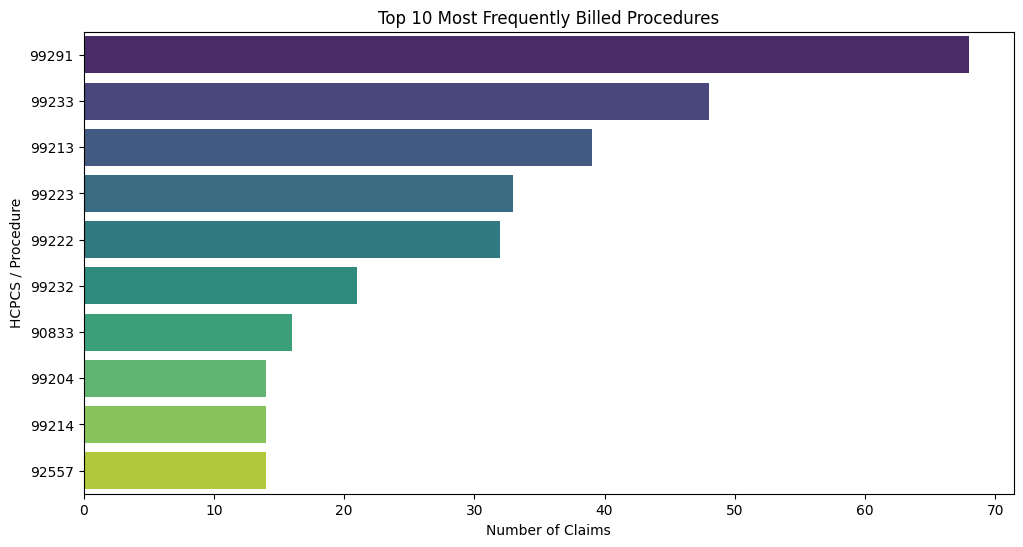

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Create a chart with the 10 most frequently billed procedure codes
plt.figure(figsize=(12,6))
sns.barplot(
    x="Frequency",
    y=top10_hcpcs.apply(lambda x: f"{x['HCPCS']} - {x['ProcedureDesc']}" if "ProcedureDesc" in top10_hcpcs.columns else x['HCPCS'], axis=1),
    data=top10_hcpcs,
    palette="viridis"
)
plt.xlabel("Number of Claims")
plt.ylabel("HCPCS / Procedure")
plt.title("Top 10 Most Frequently Billed Procedures")
plt.show()

In [ ]:
# Code place of service
pos_map = {
    11: "DOCTOR'S OFFICE",
    21: "INPATIENT",
    22: "OUTPATIENT",
    23: "EMERGENCY"
}


In [ ]:
# Create a new column with readable names
df_header["PlaceOfServiceText"] = df_header["PlaceOfService"].map(pos_map)


In [ ]:
# How many claims were submitted for each PlaceOfService?
pos_counts = df_header["PlaceOfServiceText"].value_counts()
print(pos_counts)

PlaceOfServiceText
INPATIENT          231
DOCTOR'S OFFICE    132
OUTPATIENT          24
EMERGENCY            1
Name: count, dtype: int64


In [ ]:
# What percentage of claims are for "INPATIENT" vs "DOCTOR'S OFFICE"?
pos_percentages = df_header["PlaceOfServiceText"].value_counts(normalize=True) * 100
print(pos_percentages)

PlaceOfServiceText
INPATIENT          59.536082
DOCTOR'S OFFICE    34.020619
OUTPATIENT          6.185567
EMERGENCY           0.257732
Name: proportion, dtype: float64


Inpatient claims make up 59.54% of claims while Doctor's office makes 34.02% of claims.

In [ ]:
# Merge the HEADER and LINE files
merged_df = pd.merge(df_header, df_line, on="ProspectiveClaimId", how="left")

print(merged_df)

     ClientId_x  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0            49            35216986         P          1154376309   
1            49            35235657         P          1154376309   
2            49            35249003         P          1154376309   
3            49            35249014         P          1154376309   
4            49            35249016         P          1154376309   
..          ...                 ...       ...                 ...   
515          49            36980985         P          1821035601   
516          49            36983189         P          1821035601   
517          49            36989515         P          1538114723   
518          49            36989577         P          1538114723   
519          49            36989619         P          1538114723   

                    BillingProvFirstName  BillingProvLastName  \
0       NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1       NEW YORK SPINE AND BRAIN SURGERY 

In [ ]:
# Calculate the total number of service lines per claim
merged_df["TotalServiceLines"] = merged_df.groupby("ProspectiveClaimId")["ClaimType"].transform("count")
print(merged_df)

     ClientId_x  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0            49            35216986         P          1154376309   
1            49            35235657         P          1154376309   
2            49            35249003         P          1154376309   
3            49            35249014         P          1154376309   
4            49            35249016         P          1154376309   
..          ...                 ...       ...                 ...   
515          49            36980985         P          1821035601   
516          49            36983189         P          1821035601   
517          49            36989515         P          1538114723   
518          49            36989577         P          1538114723   
519          49            36989619         P          1538114723   

                    BillingProvFirstName  BillingProvLastName  \
0       NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1       NEW YORK SPINE AND BRAIN SURGERY 

In [ ]:
# show columns
print(merged_df.columns.tolist())

['ClientId_x', 'ProspectiveClaimId', 'ClaimType', 'BillingProviderNPI', 'BillingProvFirstName', 'BillingProvLastName', 'AttendingProviderNPI', 'AttendingProvFirstName', 'AttendingProvLastName', 'RenderingProviderNPI', 'RenderingProvFirstName', 'RenderingProvLastName', 'ReferringProviderNPI', 'ReferringProvFirstName', 'ReferringProvLastName', 'OperatingProviderNPI', 'OperatingProvFirstName', 'OperatingProvLastName', 'ServiceFromDate', 'ServiceToDate', 'PrimaryPayerName', 'PrimaryPayerCode', 'PrimaryPayerCFI', 'SecondaryPayer', 'SecondaryPayerCode', 'SecondaryPayerCFI', 'TertianaryPayer', 'TertianaryPayerCode', 'TertianaryPayerCFI', 'DRG', 'AdmitType', 'DischargeStatus', 'AdmitDx', 'Facility_Location', 'CoderId_x', 'CoderName', 'PlaceOfService_x', 'WorkQueName', 'WorkQueId', 'ClinicalTrialIdentifier', 'PriorAuthorizationNo', 'InvestDeviceExmptNo', 'ReferralNo', 'PlaceOfServiceText', 'ClientId_y', 'LinePos', 'RevCode', 'HCPCS', 'Modifier1', 'Modifier2', 'Modifier3', 'Modifier4', 'DxMapDel

In [ ]:
# Identify claims with 5 or more service lines
claims_with_5_or_more_lines = merged_df[merged_df["TotalServiceLines"] >=5]
print(claims_with_5_or_more_lines)


     ClientId_x  ProspectiveClaimId ClaimType  BillingProviderNPI  \
29           49            36710175         P          1538114723   
30           49            36710175         P          1538114723   
31           49            36710175         P          1538114723   
32           49            36710175         P          1538114723   
33           49            36710175         P          1538114723   
171          49            36740402         P          1538114723   
172          49            36740402         P          1538114723   
173          49            36740402         P          1538114723   
174          49            36740402         P          1538114723   
175          49            36740402         P          1538114723   
176          49            36740402         P          1538114723   
194          49            36668119         P          1538114723   
195          49            36668119         P          1538114723   
196          49            3666811

In [ ]:
merged_df = df_header.merge(df_code, on="ProspectiveClaimId", how="left", suffixes=('_hdr','_dx'))


In [ ]:
# Display: ClaimId, Provider name, number of lines, and total charges
# Count total service lines per claim
merged_df["TotalServiceLines"] = (
    merged_df.groupby("ProspectiveClaimId")["CodePos"].transform("count")
)

# Provider full name
merged_df["ProviderName"] = (
    merged_df["BillingProvFirstName"] + " " + merged_df["BillingProvLastName"]
)
# Create TotalCharges per claim
merged_df["TotalCharges"] = (
    merged_df.groupby("ProspectiveClaimId")["CodeAmnt"]
             .transform("sum")
)
# print table
claim_with_high_service_counts = merged_df[[
    "ProspectiveClaimId",
    "ProviderName",
    "TotalServiceLines",
    "TotalCharges"
]].drop_duplicates(subset=["ProspectiveClaimId"])

print(claim_with_high_service_counts.head())

    ProspectiveClaimId ProviderName  TotalServiceLines  TotalCharges
0             35216986          NaN                 10           0.0
10            35235657          NaN                 10           0.0
20            35249003          NaN                  6           0.0
26            35249014          NaN                  6           0.0
32            35249016          NaN                  6           0.0


In [ ]:
print(merged_df.columns.tolist())

['ClientId_hdr', 'ProspectiveClaimId', 'ClaimType', 'BillingProviderNPI', 'BillingProvFirstName', 'BillingProvLastName', 'AttendingProviderNPI', 'AttendingProvFirstName', 'AttendingProvLastName', 'RenderingProviderNPI', 'RenderingProvFirstName', 'RenderingProvLastName', 'ReferringProviderNPI', 'ReferringProvFirstName', 'ReferringProvLastName', 'OperatingProviderNPI', 'OperatingProvFirstName', 'OperatingProvLastName', 'ServiceFromDate', 'ServiceToDate', 'PrimaryPayerName', 'PrimaryPayerCode', 'PrimaryPayerCFI', 'SecondaryPayer', 'SecondaryPayerCode', 'SecondaryPayerCFI', 'TertianaryPayer', 'TertianaryPayerCode', 'TertianaryPayerCFI', 'DRG', 'AdmitType', 'DischargeStatus', 'AdmitDx', 'Facility_Location', 'CoderId', 'CoderName', 'PlaceOfService', 'WorkQueName', 'WorkQueId', 'ClinicalTrialIdentifier', 'PriorAuthorizationNo', 'InvestDeviceExmptNo', 'ReferralNo', 'PlaceOfServiceText', 'ClientId_dx', 'CodeQualifier', 'CodePos', 'CodeValue', 'CodeFromDate', 'CodeToDate', 'CodeAmnt', 'POAInd', 

In [ ]:
# Create a merged dataset linking claims to both procedures and diagnoses
header_line_merged = df_header.merge(
    df_line,
    on="ProspectiveClaimId",
    how="left"
)
merged_claims = header_line_merged.merge(
    df_code,
    on=["ProspectiveClaimId"],
    how="left",
    suffixes=("_proc", "_dx")
)

In [ ]:
print(merged_claims.head())

   ClientId_x  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0          49            35216986         P          1154376309   
1          49            35216986         P          1154376309   
2          49            35216986         P          1154376309   
3          49            35216986         P          1154376309   
4          49            35216986         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   

In [ ]:
# Find the most common diagnosis code (CodeValue) associated with CPT code 99291
# Merge header + procedure lines
header_line = df_header.merge(df_line, on="ProspectiveClaimId", how="left")
# Merge with diagnosis codes
merged_claims = header_line.merge(
    df_code,
    on="ProspectiveClaimId",
    how="left",
    suffixes=('_proc', '_dx')
)

In [ ]:
print(merged_claims.head())
print(merged_claims.columns)

   ClientId_x  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0          49            35216986         P          1154376309   
1          49            35216986         P          1154376309   
2          49            35216986         P          1154376309   
3          49            35216986         P          1154376309   
4          49            35216986         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   

In [ ]:
# Filter only claims with CPT code 99291
cpt_99291 = merged_claims[merged_claims["HCPCS"] == "99291"]
print(cpt_99291.head())

   ClientId_x  ProspectiveClaimId ClaimType  BillingProviderNPI  \
0          49            35216986         P          1154376309   
1          49            35216986         P          1154376309   
2          49            35216986         P          1154376309   
3          49            35216986         P          1154376309   
4          49            35216986         P          1154376309   

               BillingProvFirstName  BillingProvLastName  \
0  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
1  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
2  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
3  NEW YORK SPINE AND BRAIN SURGERY                  NaN   
4  NEW YORK SPINE AND BRAIN SURGERY                  NaN   

   AttendingProviderNPI AttendingProvFirstName AttendingProvLastName  \
0                   NaN                    NaN                   NaN   
1                   NaN                    NaN                   NaN   
2                   

In [ ]:
# Count the most common diagnosis codes
most_common_dx = cpt_99291["CodeValue"].value_counts().head(10)
# Print results
print(most_common_dx)

CodeValue
J96.01     53
G93.5      34
E78.5      33
I61.9      26
D64.9      25
I10        24
I60.8      24
I95.9      20
D72.829    19
I67.848    17
Name: count, dtype: int64


In [ ]:
# Question 8: Charges by Payer
# Merge HEADER + LINE on ProspectiveClaimId
merged_df = df_header.merge(df_line, on="ProspectiveClaimId", how="left")

In [ ]:
# Total charges per claim
total_charges_per_claim = merged_df.groupby("ProspectiveClaimId")["Charges"].sum().reset_index()
total_charges_per_claim.rename(columns={"Charges": "TotalCharges"}, inplace=True)
merged_claims = df_header.merge(total_charges_per_claim, on="ProspectiveClaimId", how="left")

In [ ]:
# Group by PrimaryPayerName and calculate total charges, Average charges per claim, and number of claims
payer_summary = merged_claims.groupby("PrimaryPayerName").agg(
    TotalCharges = ("TotalCharges", "sum"),
    AverageChargesPerClaim = ("TotalCharges", "mean"),
    NumberOfClaims = ("ProspectiveClaimId", "nunique")
).reset_index()

In [ ]:
# Sort by total charges descending and display top 10 payers
top10_payers = payer_summary.sort_values("TotalCharges", ascending=False).head(10)
print(top10_payers)

                      PrimaryPayerName  TotalCharges  AverageChargesPerClaim  \
17                            MEDICARE        131008              541.355372   
12                     HEALTHFIRST FFS         29794              647.695652   
9           FIDELIS/BETTER HEALTH PLAN         10810              415.769231   
14                        HIP MEDICAID         10014              589.058824   
0                                AETNA          6930             1155.000000   
4                      DIRECT SELF PAY          6575             1095.833333   
21  UNITED COMMUNITY PLAN GOVT PROGRAM          5175             1035.000000   
10               HEALTHFIRST CAPITATED          4905              490.500000   
7                       EMPIRE BLUE SR          4620             1155.000000   
15                           MAGNACARE          3465             1155.000000   

    NumberOfClaims  
17             242  
12              46  
9               26  
14              17  
0             

In [ ]:
# Question 9: Your Own Analysis Develop and answer your own analytical question using the claims data.
# What is the relationship between place of service and average charges?
# Merge on ProspectiveClaimId
merged_df = df_header.merge(df_line, on="ProspectiveClaimId", how="left")

In [ ]:
# Sum all line charges per claim
total_charges_per_claim = merged_df.groupby("ProspectiveClaimId")["Charges"].sum().reset_index()
total_charges_per_claim.rename(columns={"Charges": "TotalCharges"}, inplace=True)

# Merge back with HEADER to get PlaceOfService
claims_with_charges = df_header.merge(total_charges_per_claim, on="ProspectiveClaimId", how="left")

# Group by PlaceOfService
pos_summary = claims_with_charges.groupby("PlaceOfService").agg(
    AverageCharges = ("TotalCharges", "mean"),
    TotalClaims = ("ProspectiveClaimId", "nunique")
).reset_index()

# Sort descending by average charges
pos_summary = pos_summary.sort_values("AverageCharges", ascending=False)
print(pos_summary)

   PlaceOfService  AverageCharges  TotalClaims
2              22      989.625000           24
1              21      678.593074          231
0              11      423.901515          132
3              23      410.000000            1
